In [130]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
# plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.set_context("notebook")
DATA_PATH = '../data/'

In [141]:
df = pd.read_csv(os.path.join(DATA_PATH,'creditcard.csv'))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Preprocessing

Some basic checks: are there NAN's or duplicate rows?
* NaN's : There are not
* Duplicates: There are, so we erase them, this would disturb the metrics (biasing them towards too optimistic values)

In [132]:
print("Total number of NaN's:",df.isna().sum().sum())
print("Number of duplicated rows:",df.duplicated().sum())

Total number of NaN's: 0
Number of duplicated rows: 1081


In [133]:
df = df[df.duplicated()==False]
df.reset_index(inplace=True,drop=True)

As expected, we are working with a highly unbalance dataset, the mean of Class is 0.001667, 

which means that only 0.17% of the entries correspond to Class 1, Fraud.

In [134]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


## Feature engineering: Time and Amount

We check that the Time variable correspond to seconds (the database indicates that it correspond to two days)

In [135]:
print('Total number of days:',df.Time.max()/60/60/24)

Total number of days: 1.9999074074074075


We can perform some feature engineering based on the Time variable

In [142]:
df['TimeScaled'] = df.Time/60/60/48
df['TimeSin'] = np.sin(2*np.pi*df.Time/60/60/24) 
df['TimeCos'] = np.cos(2*np.pi*df.Time/60/60/24) 
df.drop(columns='Time',inplace=True)

Some basic statistics for each variable in the dataframe.
It easily observed that all V's variables have zero mean and order 1 standard deviation (and they are sorted by it), they come from a PCA in which the variables where scaled before the PCA.

There are entries with Amount = 0. What's is the meaning of this? Transactions with no money interchange? Is that really a Fraud? Is it interesting to detect them? Those are questions that we cannot answer here, but should be investigated in case of a real world problem.

We can see that in this subgroup of the data, there is an over-representation of class 1 (FRAUD). 

In [143]:
print('Probability of each one of the classes in the whole dataset')
for i, prob in enumerate(df.Class.value_counts(normalize=True)):
    print('Class {}: {:.2f} %'.format(i,prob*100))

Probability of each one of the classes in the whole dataset
Class 0: 99.83 %
Class 1: 0.17 %


In [144]:
print('Probability of each one of the classes in the entries with Amount = 0')
for i, prob in enumerate(df[df.Amount==0].Class.value_counts(normalize=True)):
    print('Class {}: {:.2f} %'.format(i,prob*100))

Probability of each one of the classes in the entries with Amount = 0
Class 0: 98.52 %
Class 1: 1.48 %


The Amount variable is too disperse, so it is better to work with it in logarithm scale, and then rescale it.

This does not matter for Decision Tree based methods. Exercise: Why?

/Users/danky/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


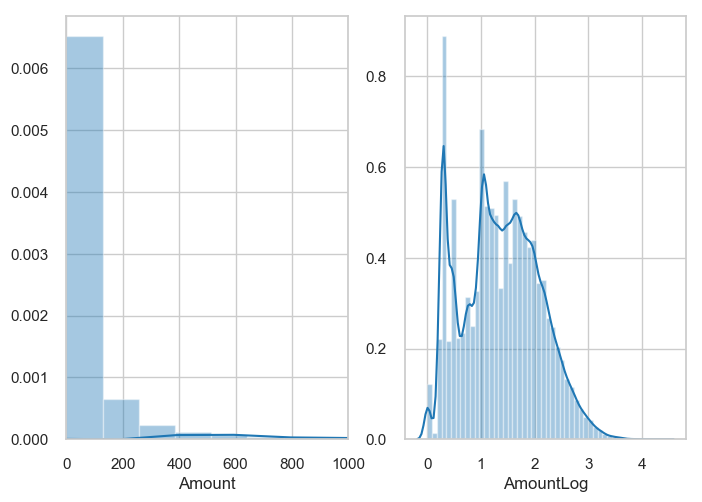

In [145]:
df['AmountLog'] = np.log10(1.+df.Amount)
plt.subplot(121)
sns.distplot(df.Amount,bins=200)
plt.xlim((0,1000))
plt.subplot(122)
sns.distplot(df.AmountLog)
df.drop(columns='Amount',inplace=True)
plt.show()

Now, we save a copy of the cleaned dataframe, in order to preserve the preprocessing.

In [146]:
df.to_csv(os.path.join(DATA_PATH,'df_clean.csv'))

## Exploration

### One dimensional histograms

Let us explore the Time variable, can we see any pattern?

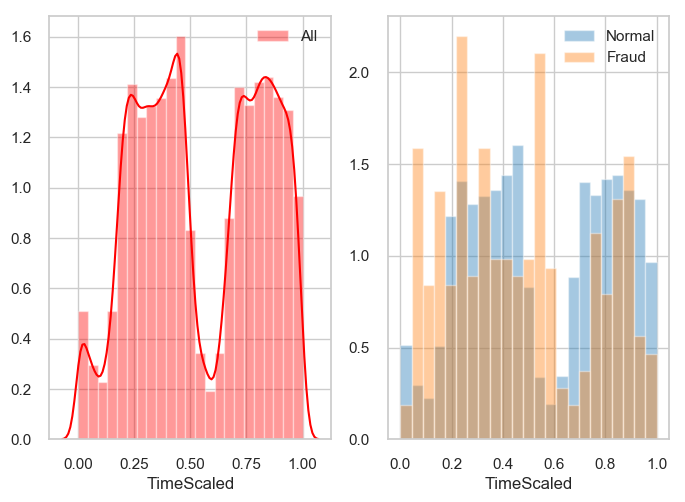

In [154]:
bins = np.linspace(0,1,24)
plt.subplot(121)
sns.distplot(df.TimeScaled,bins=bins,label='All',color='red')
plt.legend()
plt.subplot(122)
sns.distplot(df[df.Class==0].TimeScaled,bins=bins,kde=False,norm_hist=True,label='Normal')
sns.distplot(df[df.Class==1].TimeScaled,bins=bins,kde=False,norm_hist=True,label='Fraud')
plt.legend()
plt.show()

We can explore the histograms for all the variables, since there are around 30 of them.

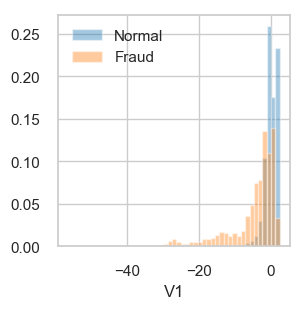

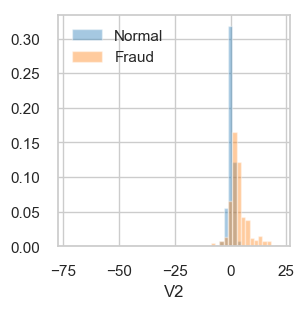

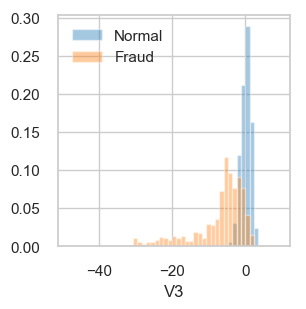

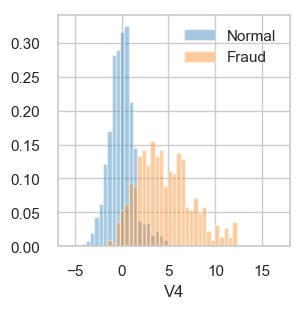

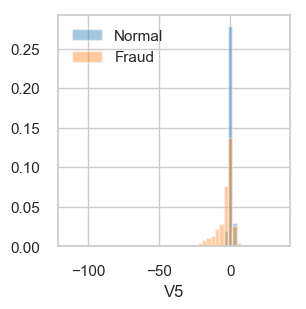

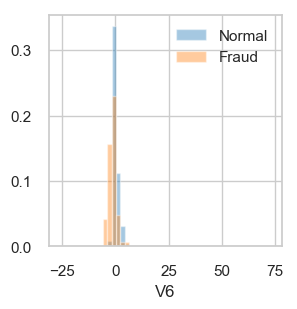

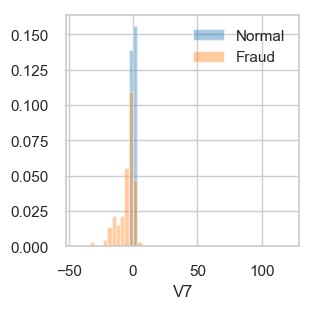

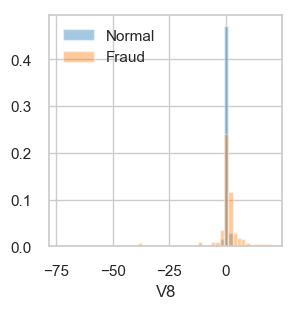

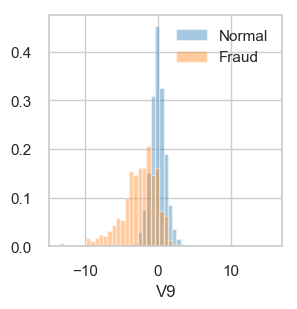

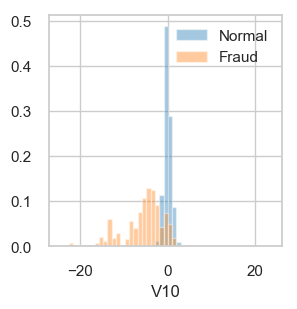

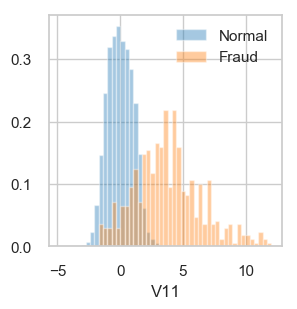

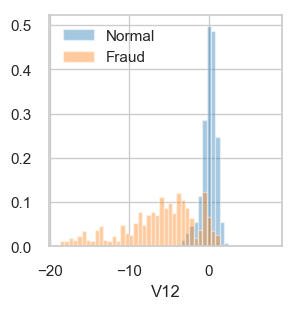

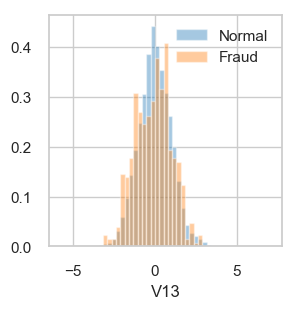

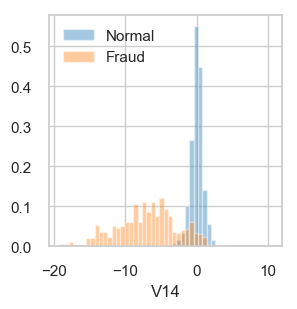

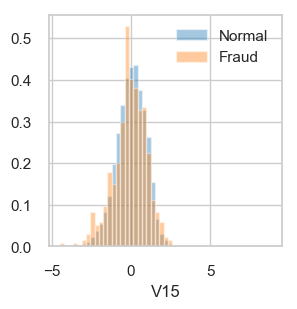

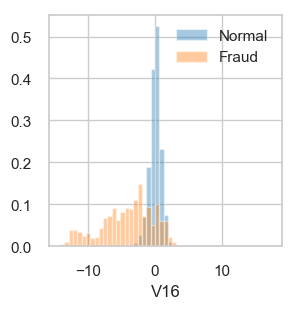

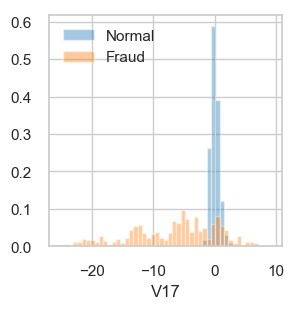

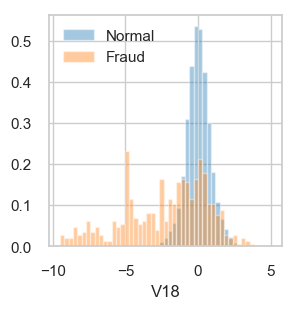

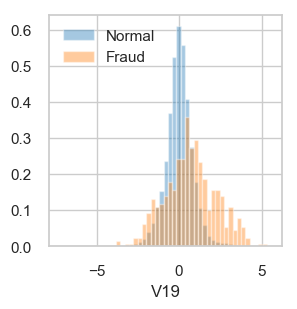

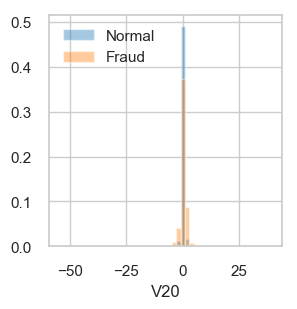

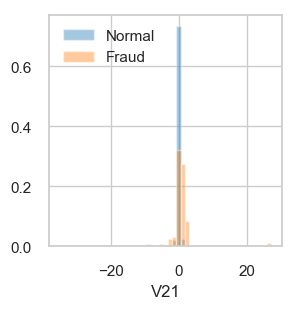

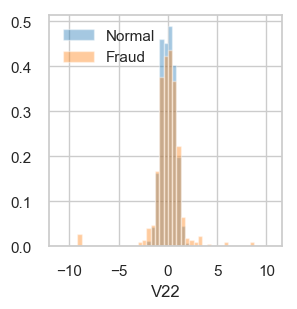

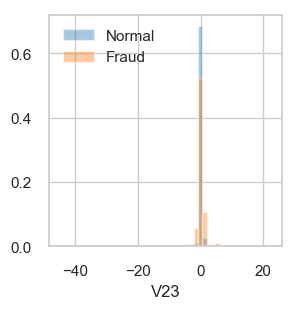

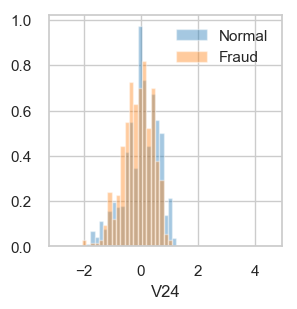

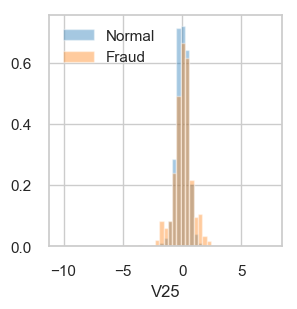

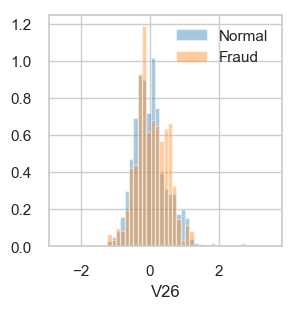

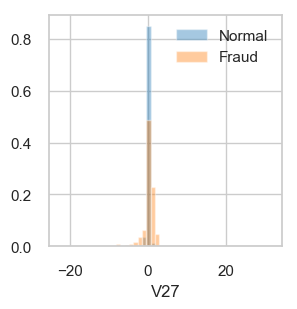

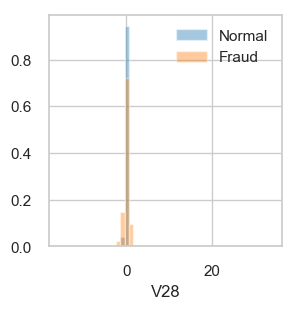

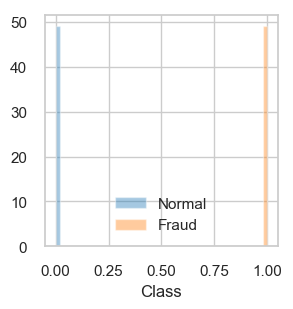

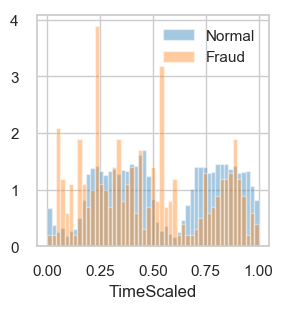

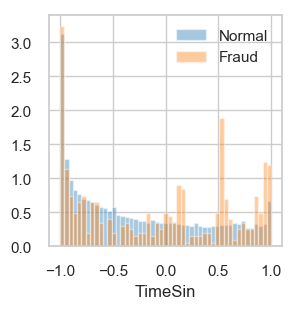

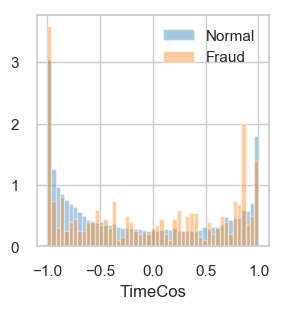

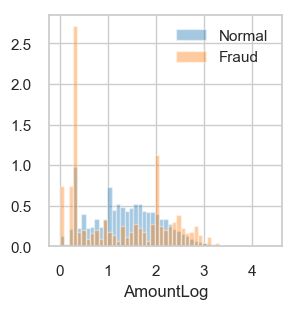

In [158]:
for variable in df.columns:
    plt.figure(figsize=(3,3))
    bins = np.linspace(df[variable].min(),df[variable].max(),50)
    sns.distplot(df[df.Class==0][variable],bins=bins,kde=False,norm_hist=True,label='Normal',axlabel=variable)
    sns.distplot(df[df.Class==1][variable],bins=bins,kde=False,norm_hist=True,label='Fraud',axlabel=variable)
    plt.legend()
    plt.show()

### Pairwise scatterplots

A really good way of getting intuition is through pairplots, i.e., scatter plots using two variables. In this way we can check if some variables are useful to disentangle the entries by Class.

In this case, since there are 28+2 features, there would be 900/2 plots to check the pairwise relations.

/Users/danky/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


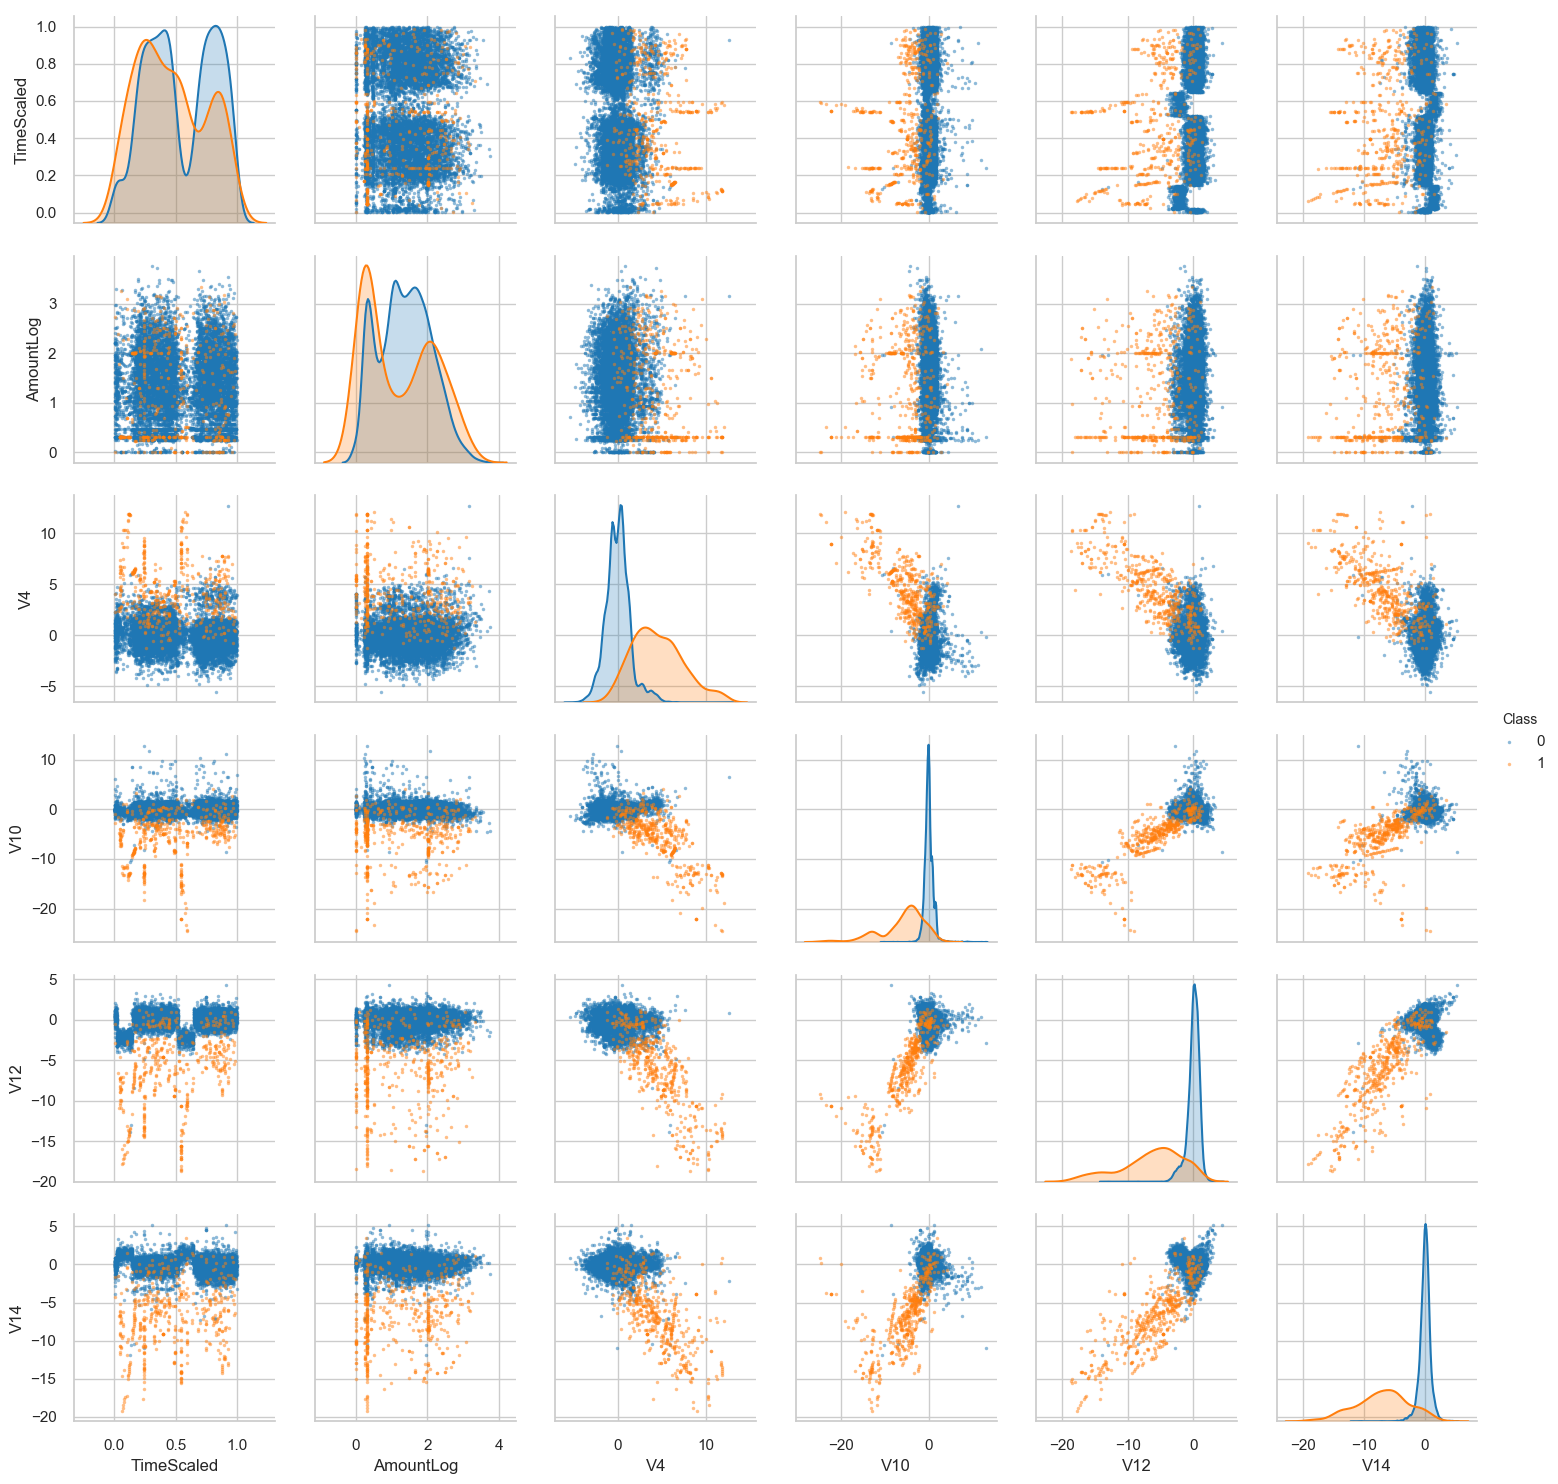

In [190]:
# We first downsample Class 0 (normal) to obtain clearer plots
df_small = pd.merge(  df[df.Class==1],df[df.Class==0].sample(n=10000),how='outer')
# We cannot plot all the variables, there are too many
variables_to_show = ['TimeScaled','AmountLog','V4','V10','V12','V14']
sns.pairplot(df_small,vars=variables_to_show,
             hue='Class',kind='scatter',markers="o",
               plot_kws=dict(s=6, edgecolor=None, linewidth=0.01,alpha=0.5))
plt.show()

Same pairwise scatterplot with all the data, we visualize it easily giving some transparency to the most populated class, and also using smaller markers for it.

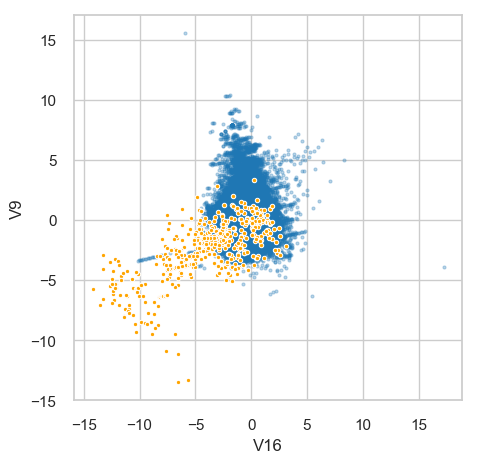

In [195]:
plt.figure(figsize=(5,5))
x_var = 'V16'
y_var = 'V9'
sns.scatterplot(data=df[df.Class==0],x=x_var, y=y_var,s=5,edgecolor=None,alpha=0.3)
sns.scatterplot(data=df[df.Class==1],x=x_var, y=y_var,color='orange',s=10,edgecolor='w')
plt.show()

### Correlations

It is also easy to see correlations among variables, but it is not very useful in this case.

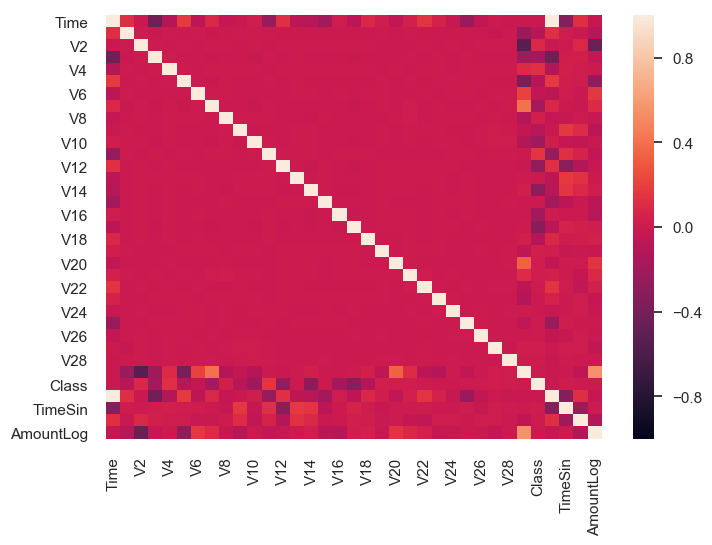

In [125]:
sns.heatmap(df.corr(),vmin=-1,vmax=1)

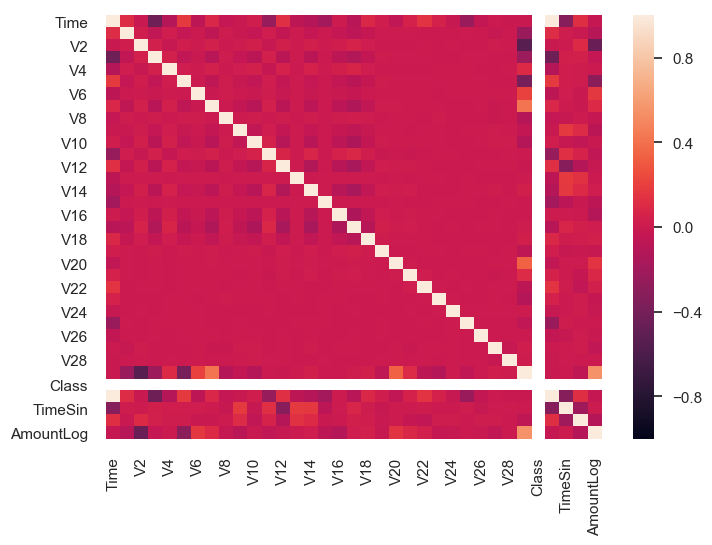

In [124]:
sns.heatmap(df[df.Class==0].corr(),vmin=-1,vmax=1)

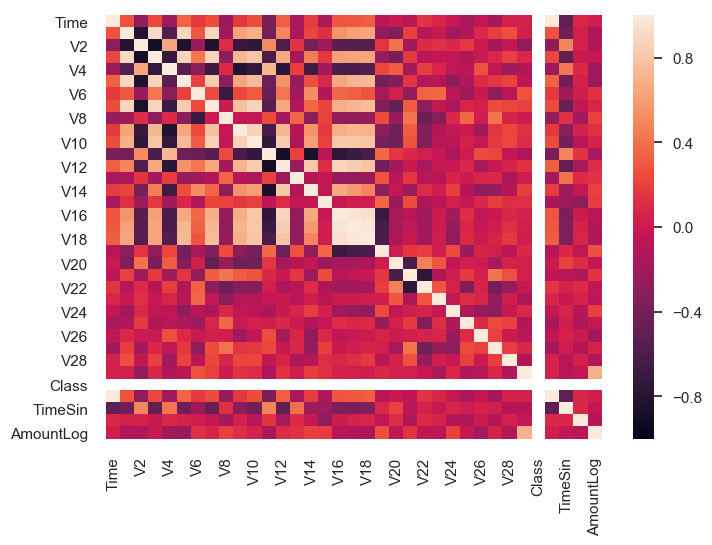

In [123]:
sns.heatmap(df[df.Class==1].corr(),vmin=-1,vmax=1)